In [1]:
import sys
sys.path.append("..")
from util.oneDTravelWave import oneDTravelWave
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.io import savemat

In [2]:
delta_x = 1.

In [3]:
distances = np.arange(500)*delta_x

In [4]:
X = 0.5*(np.tanh( 0.02*(distances-100))+1)

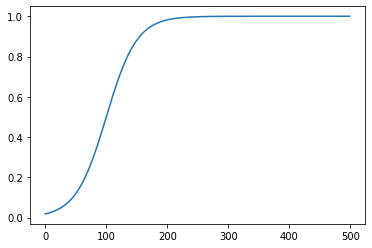

In [5]:
plt.plot(X)

In [6]:
delta_t_frame = 0.02
predict_interval = 5000

In [7]:
prediction = oneDTravelWave(X, predict_interval=predict_interval, gamma=1, m=-0.4,
                   ypsilon=10, num_time_step_between_frame=1, delta_t_frame=delta_t_frame,delta_x=delta_x)
prediction = np.squeeze(prediction)

In [8]:
prediction.shape

(500, 5000)

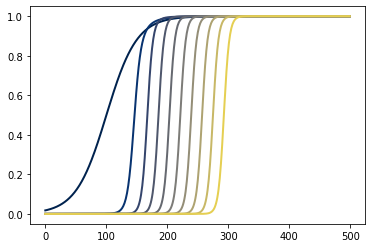

In [9]:
cmap = mpl.cm.cividis
step = 500
for i in range(0,predict_interval, step):
    plt.plot(prediction[:,i],linestyle='-',color=cmap(i / float(predict_interval)),linewidth=2)
#plt.legend()

In [10]:
shape = prediction.shape
time = np.arange(shape[1])*delta_t_frame
x = np.arange(shape[0])*delta_x
x = x.astype(np.double)
x = np.expand_dims(x,0)
time = np.expand_dims(time,1)

In [11]:
to_matlab = {'t':time[:500], 'x':x, 'usol':prediction[:,:500]}
savemat('../data/phase_field_oneD_simulation_beginning_stage.mat',to_matlab)

In [12]:
std = np.std(np.reshape(prediction[:,:500], (-1)))

In [19]:
noise_percentage = 0.02
shape = prediction[:,:500].shape
noise_data = np.random.normal(scale=noise_percentage*std,size=shape) + prediction[:,:500]

In [20]:
to_matlab = {'t':time[:500], 'x':x, 'usol':noise_data[:,:500]}
savemat('../data/phase_field_oneD_simulation_beginning_stage_0.02noise.mat',to_matlab)

In [14]:
to_matlab = {'t':time[4000:4500], 'x':x, 'usol':prediction[:,4000:4500]}
savemat('../data/phase_field_oneD_simulation_second_stage.mat',to_matlab)